In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # устанавливаем seaborn как по-умолчанию для отрисовки графиков

In [2]:
train = pd.read_csv('Data/train2.csv')
test = pd.read_csv('Data/test2.csv')

In [3]:
train.head()

,date,snow_height,degree_coverage,tmean,post_1,post_2,post_4,post_5,post_6,post_7,post_8,post_9,post_10,post_11,post_9387
0,2008-01-01,38,10,-14.3,381,138,287,324,162,138,215,213,314,215,79
1,2008-01-02,38,10,-21.1,381,138,288,323,167,138,215,213,311,215,79
2,2008-01-03,38,10,-41.6,381,138,288,324,165,138,215,213,309,214,79
3,2008-01-04,38,10,-44.2,381,138,288,325,162,138,215,213,307,214,79
4,2008-01-05,38,10,-27.1,381,138,287,326,163,138,215,213,306,213,78


In [4]:
train.shape

(2192, 15)

In [5]:
train.describe()

,snow_height,degree_coverage,tmean,post_1,post_2,post_4,post_5,post_6,post_7,post_8,post_9,post_10,post_11,post_9387
count,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000,2192.000000
mean,22.771442,5.729015,-4.516834,384.961679,166.162409,355.057482,361.824361,156.365420,158.418796,208.501825,338.369982,374.685675,205.953467,84.120438
std,24.336719,4.861901,18.031654,106.929949,105.249620,182.800518,91.434621,61.711799,117.246797,235.101178,203.334446,207.647870,38.029423,113.312310
min,0.000000,0.000000,-50.500000,13.000000,99.000000,12.000000,12.000000,6.000000,69.000000,47.000000,13.000000,13.000000,7.000000,1.000000
25%,0.000000,0.000000,-18.500000,336.000000,117.750000,258.000000,305.000000,127.000000,91.000000,91.000000,233.000000,265.000000,182.000000,28.000000
50%,15.000000,10.000000,-0.850000,360.500000,131.000000,286.000000,335.000000,140.000000,136.000000,125.000000,292.000000,303.000000,201.000000,49.000000
75%,45.000000,10.000000,10.900000,395.000000,151.000000,346.000000,384.000000,162.000000,168.250000,211.000000,351.000000,400.000000,220.000000,82.000000
max,79.000000,10.000000,24.400000,1094.000000,742.000000,1319.000000,808.000000,638.000000,848.000000,1582.000000,1420.000000,1466.000000,406.000000,821.000000


#train.describe(include = ['O'])

Достаточным для навигации уровнем считать уровень реки в 220 сантиметров на гидрологическом посту в поселке Ванавара. Код поста 9387. Переделаем знчение post_9387 в категории 1 и 0

In [6]:
train.loc[(train['post_9387'] >= 220), 'post_9387'] = 1
train.loc[(train['post_9387'] < 220) & (train['post_9387'] != 1), 'post_9387'] = 0

test.loc[(test['post_9387'] >= 220), 'post_9387'] = 1
test.loc[(test['post_9387'] < 220) & (test['post_9387'] != 1), 'post_9387'] = 0

In [7]:
train.loc[(train.post_9387) == 0]

,date,snow_height,degree_coverage,tmean,post_1,post_2,post_4,post_5,post_6,post_7,post_8,post_9,post_10,post_11,post_9387
0,2008-01-01,38,10,-14.3,381,138,287,324,162,138,215,213,314,215,0
1,2008-01-02,38,10,-21.1,381,138,288,323,167,138,215,213,311,215,0
2,2008-01-03,38,10,-41.6,381,138,288,324,165,138,215,213,309,214,0
3,2008-01-04,38,10,-44.2,381,138,288,325,162,138,215,213,307,214,0
4,2008-01-05,38,10,-27.1,381,138,287,326,163,138,215,213,306,213,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2017-12-27,45,10,-11.8,334,108,260,353,208,71,124,282,336,212,0
2188,2017-12-28,46,10,-21.5,334,108,259,352,204,71,123,282,335,212,0
2189,2017-12-29,47,10,-21.0,334,108,259,351,207,71,122,280,334,211,0
2190,2017-12-30,47,10,-29.9,334,108,259,350,217,71,120,276,334,210,0


In [8]:
test.shape

(1096, 16)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1096 non-null   object 
 1   snow_height      1096 non-null   int64  
 2   degree_coverage  1096 non-null   int64  
 3   tmean            1096 non-null   float64
 4   post_1           1096 non-null   int64  
 5   post_2           1096 non-null   int64  
 6   post_3           1096 non-null   int64  
 7   post_4           1096 non-null   int64  
 8   post_5           1096 non-null   int64  
 9   post_6           1096 non-null   int64  
 10  post_7           1096 non-null   int64  
 11  post_8           1096 non-null   int64  
 12  post_9           1096 non-null   int64  
 13  post_10          1096 non-null   int64  
 14  post_11          1096 non-null   int64  
 15  post_9387        1096 non-null   int64  
dtypes: float64(1), int64(14), object(1)
memory usage: 137.1+ KB


In [10]:
test.isnull().sum()

date               0
snow_height        0
degree_coverage    0
tmean              0
post_1             0
post_2             0
post_3             0
post_4             0
post_5             0
post_6             0
post_7             0
post_8             0
post_9             0
post_10            0
post_11            0
post_9387          0
dtype: int64

In [96]:
train_2008 = train[  (train['date'] >= '2008-01-01') & (train['date'] <= '2008-12-31') ]
test_2010  = train[  (train['date'] >= '2014-01-01') & (train['date'] <= '2015-12-31') ]
#train_2008.date.unique()
test_2010
#train_2008

,date,snow_height,degree_coverage,tmean,post_1,post_2,post_4,post_5,post_6,post_7,post_8,post_9,post_10,post_11,post_9387
1097,2014-01-01,49,10,-35.2,325,108,258,375,192,97,89,295,283,222,0
1098,2014-01-02,49,10,-37.0,325,108,258,374,188,97,89,295,282,221,0
1099,2014-01-03,49,10,-32.1,325,108,258,374,187,97,89,295,282,220,0
1100,2014-01-04,49,10,-25.6,325,108,258,373,184,97,89,295,281,219,0
1101,2014-01-05,49,10,-39.2,325,108,258,372,181,96,89,295,281,218,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2015-12-27,49,10,-24.9,340,125,298,404,204,101,185,271,403,226,0
1823,2015-12-28,51,10,-10.8,340,125,297,402,201,101,185,271,402,226,0
1824,2015-12-29,54,10,-7.2,340,125,297,399,202,101,184,271,400,225,0
1825,2015-12-30,55,10,-8.0,339,125,296,397,204,101,184,271,398,224,0


In [97]:

#Конвертируем дату(строки) в дату (datetime64)
train_2008['date'] = train_2008['date'].astype('datetime64[ns]').dt.strftime("%j").astype(int)
test_2010['date'] =test_2010['date'].astype('datetime64[ns]').dt.strftime("%j").astype(int)


C:\Users\Rhino\AppData\Local\Temp\ipykernel_11220\818395739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_2008['date'] = train_2008['date'].astype('datetime64[ns]').dt.strftime("%j").astype(int)
C:\Users\Rhino\AppData\Local\Temp\ipykernel_11220\818395739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_2010['date'] =test_2010['date'].astype('datetime64[ns]').dt.strftime("%j").astype(int)


In [98]:
#test_2009.head()
print(test_2010.value_counts())
print(train_2008.value_counts())

date  snow_height  degree_coverage  tmean  post_1  post_2  post_4  post_5  post_6  post_7  post_8  post_9  post_10  post_11  post_9387
1     49           10               -35.2  325     108     258     375     192     97      89      295     283      222      0            1
240   0            0                 15.0  362     119     280     340     143     149     120     313     333      171      0            1
241   0            0                 10.2  361     118     278     334     143     149     119     327     332      178      0            1
242   0            0                 6.8   338     115     383     391     132     171     161     335     343      206      0            1
                                     13.8  360     117     276     334     143     148     117     341     331      170      0            1
                                                                                                                                         ..
123   10           10    

In [99]:
 

corr_matrix = train_2008.corr()
corr_matrix

,date,snow_height,degree_coverage,tmean,post_1,post_2,post_4,post_5,post_6,post_7,post_8,post_9,post_10,post_11,post_9387
date,1.000000,-0.364699,-0.232830,0.138798,0.074813,0.015598,0.146424,0.316162,0.179511,0.109111,-0.024169,0.255561,0.223039,0.026758,-0.114415
snow_height,-0.364699,1.000000,0.883040,-0.742142,-0.305869,-0.391782,-0.723219,-0.280763,-0.179565,-0.447780,-0.401982,-0.617790,-0.451207,0.061543,-0.278817
degree_coverage,-0.232830,0.883040,1.000000,-0.794232,-0.282222,-0.403796,-0.780140,-0.291333,-0.187105,-0.445636,-0.417245,-0.624904,-0.473209,0.310759,-0.279183
tmean,0.138798,-0.742142,-0.794232,1.000000,0.195821,0.328357,0.663242,0.157654,-0.010245,0.313467,0.320334,0.451916,0.320834,-0.153063,0.218562
post_1,0.074813,-0.305869,-0.282222,0.195821,1.000000,0.860779,0.685092,0.694503,0.731341,0.944183,0.923544,0.742650,0.803498,0.453062,0.819813
post_2,0.015598,-0.391782,-0.403796,0.328357,0.860779,1.000000,0.769259,0.769991,0.749391,0.870250,0.936689,0.871181,0.916803,0.418855,0.894795
post_4,0.146424,-0.723219,-0.780140,0.663242,0.685092,0.769259,1.000000,0.596521,0.519327,0.763896,0.764257,0.829739,0.770205,0.076238,0.625223
post_5,0.316162,-0.280763,-0.291333,0.157654,0.694503,0.769991,0.596521,1.000000,0.810082,0.671347,0.728337,0.778390,0.857577,0.371257,0.591557
post_6,0.179511,-0.179565,-0.187105,-0.010245,0.731341,0.749391,0.519327,0.810082,1.000000,0.703105,0.790518,0.774098,0.854822,0.325675,0.584085
post_7,0.109111,-0.447780,-0.445636,0.313467,0.944183,0.870250,0.763896,0.671347,0.703105,1.000000,0.930390,0.827932,0.851139,0.342321,0.818877


<Axes: >

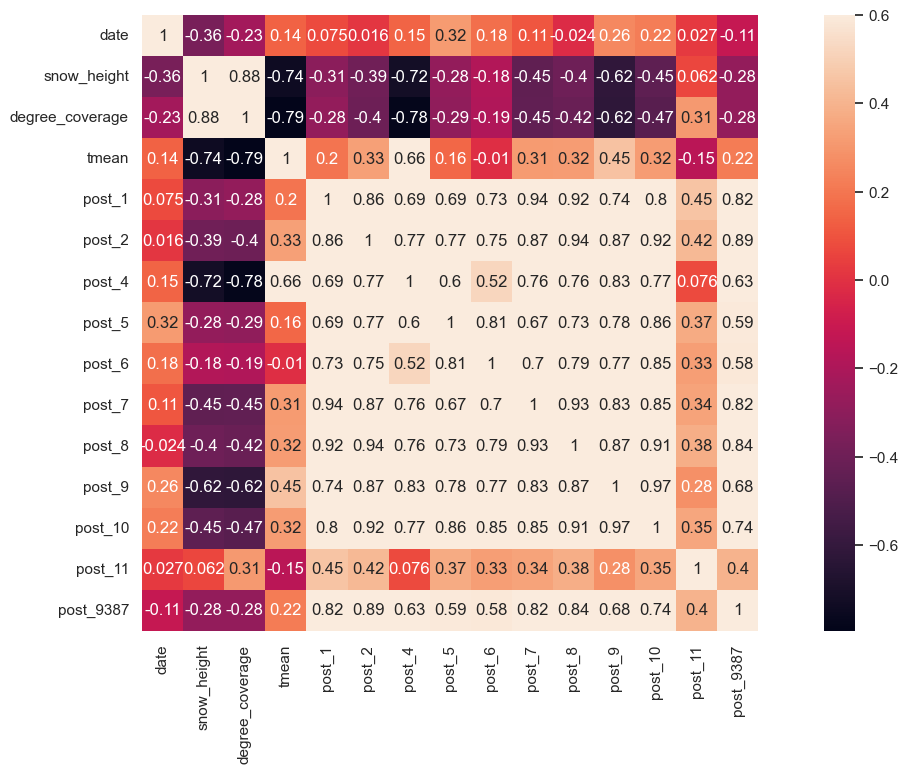

In [100]:
plt.figure(figsize=(17,8))
sns.heatmap(corr_matrix, vmax=0.6, square=True, annot=True)

In [101]:
#train_2008 = train_2008.loc[:, ~train_2008.columns.isin(['date'])]
#test_2009 = test_2009.loc[:, ~test_2009.columns.isin(['date'])]


X_train = train_2008.drop('post_9387', axis=1)
y_train = train_2008['post_9387']

X_test = test_2010.drop("post_9387", axis=1).copy()
y_test = test_2010['post_9387']

X_train.shape, y_train.shape, X_test.shape
#X_train.head()
y_test

1097    0
1098    0
1099    0
1100    0
1101    0
       ..
1822    0
1823    0
1824    0
1825    0
1826    0
Name: post_9387, Length: 730, dtype: int64

In [102]:
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [103]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)
#acc_log_reg = round( clf.score(X_test, y_test) * 100, 2)
print (str(acc_log_reg) + ' percent')

100.0 percent


In [104]:
#len(X_train)
#len(predictions)
X_test = X_test.assign(post_9387=pd.Series(predictions).values)

<Axes: xlabel='date', ylabel='post_9387'>

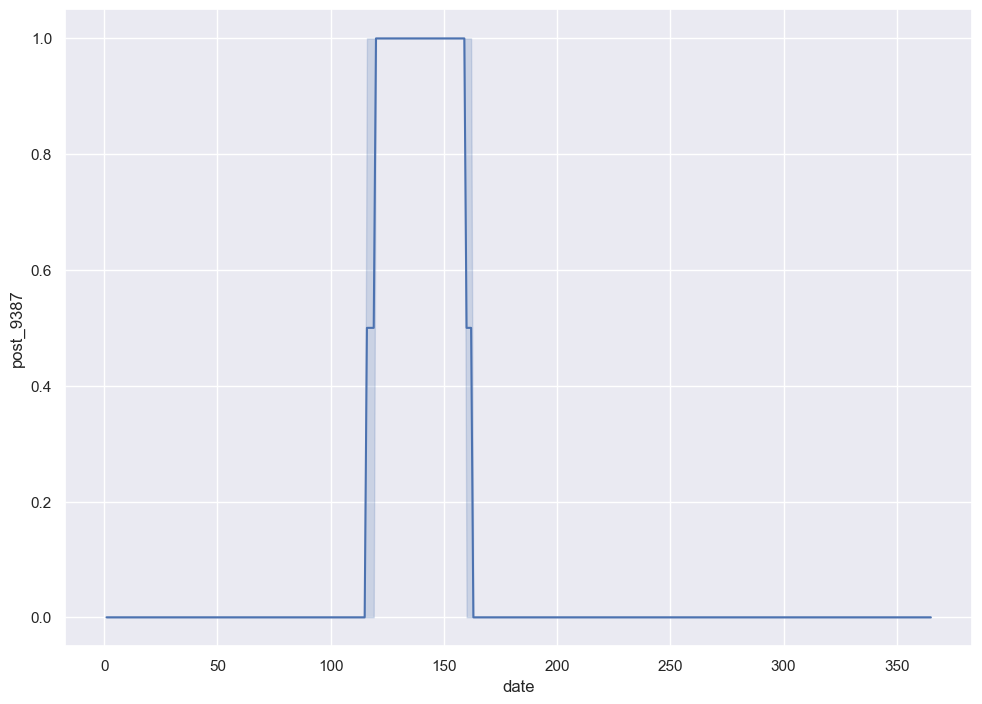

In [106]:
#sns.histplot(y=X_test['post_9387'], x=X_test['date'],bins=60, kde=True)
#sns.histplot(y=X_test['post_1'], x=X_test['date'])

#plt.figure(figsize=(15,9))
#plt.plot(X_test['date'],X_test['post_2'],'g')
#plt.plot(X_test['date'],X_test['post_9387'],'g')

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x = X_test['date'], y=X_test['post_9387'])

